## 1. ocd_patient_dataset

Objetivo: Verificar se há diferença no escore Y-BOCS para obsessões entre pacientes dos sexos feminino e masculino dado um nível de significância de 5%. 

**Hipóteses:**

- H0: Não há diferença significativa nas médias dos escores Y-BOCS entre os sexos (μ_female - μ_male = 0).
- H1: Há diferença significativa nas médias dos escores Y-BOCS entre os sexos (μ_female - μ_male ≠ 0).

In [302]:
import os
os.chdir("C:\\Users\\user\\Documents\\MBA_PUC_MINAS_Estatistica_Descritiva_Calculo_Probabilidades_Turma 1\\TrabalhoFinal_InferenciaEstatistica\\")
print(os.getcwd())

C:\Users\user\Documents\MBA_PUC_MINAS_Estatistica_Descritiva_Calculo_Probabilidades_Turma 1\TrabalhoFinal_InferenciaEstatistica


In [326]:
import pandas as pd
data = pd.read_csv('ocd_patient_dataset.csv', sep=',')
data.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None


In [327]:
df = pd.DataFrame(data[['Gender','Y-BOCS Score (Obsessions)']])

In [304]:
df.head()

,Gender,Y-BOCS Score (Obsessions)
0,Female,17
1,Male,21
2,Male,3
3,Female,14
4,Female,39


In [305]:
df.shape

(1500, 2)

In [306]:
df.describe()

,Y-BOCS Score (Obsessions)
count,1500.000000
mean,20.048000
std,11.823884
min,0.000000
25%,10.000000
50%,20.000000
75%,31.000000
max,40.000000


In [307]:
df.isnull().sum().sort_index()/len(df)

Gender                       0.0
Y-BOCS Score (Obsessions)    0.0
dtype: float64

In [308]:
df.isna().sum().sort_index()/len(df)

Gender                       0.0
Y-BOCS Score (Obsessions)    0.0
dtype: float64

In [309]:
(df['Y-BOCS Score (Obsessions)'] < 0).sum()

0

In [310]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [311]:
tabela_frequencia  = df['Gender'].value_counts().reset_index()
tabela_frequencia.columns = ['Valor', 'Frequência']
tabela_frequencia = tabela_frequencia.sort_values(by='Valor')
print(tabela_frequencia)

    Valor  Frequência
1  Female         747
0    Male         753


In [312]:
escores_female = df[df['Gender'] == 'Female']['Y-BOCS Score (Obsessions)']
escores_male = df[df['Gender'] == 'Male']['Y-BOCS Score (Obsessions)']

In [313]:
escores_female.head(), escores_male.head()

(0    17
 3    14
 4    39
 5    26
 6    12
 Name: Y-BOCS Score (Obsessions), dtype: int64,
 1     21
 2      3
 7     31
 8     37
 15    17
 Name: Y-BOCS Score (Obsessions), dtype: int64)

## Análise de ajuste de uma distribuição normal

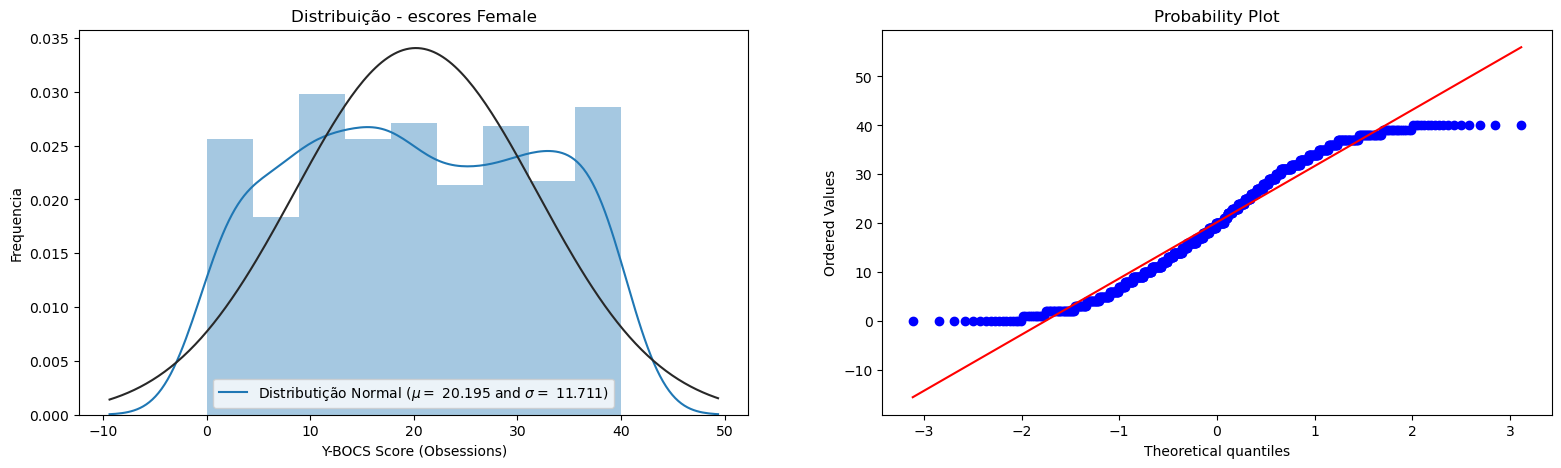

In [314]:
from scipy.stats import norm, skew
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

(mu, sigma) = norm.fit(escores_female)
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(19, 5))

ax1 = sns.distplot(escores_female , fit=norm, ax=ax1)
ax1.legend([f'Distributição Normal ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequencia')
ax1.set_title(f'Distribuição - escores Female')
   
# Usando probplot para o gráfico de probabilidade
stats.probplot(escores_female, plot=ax2)
f.show();  

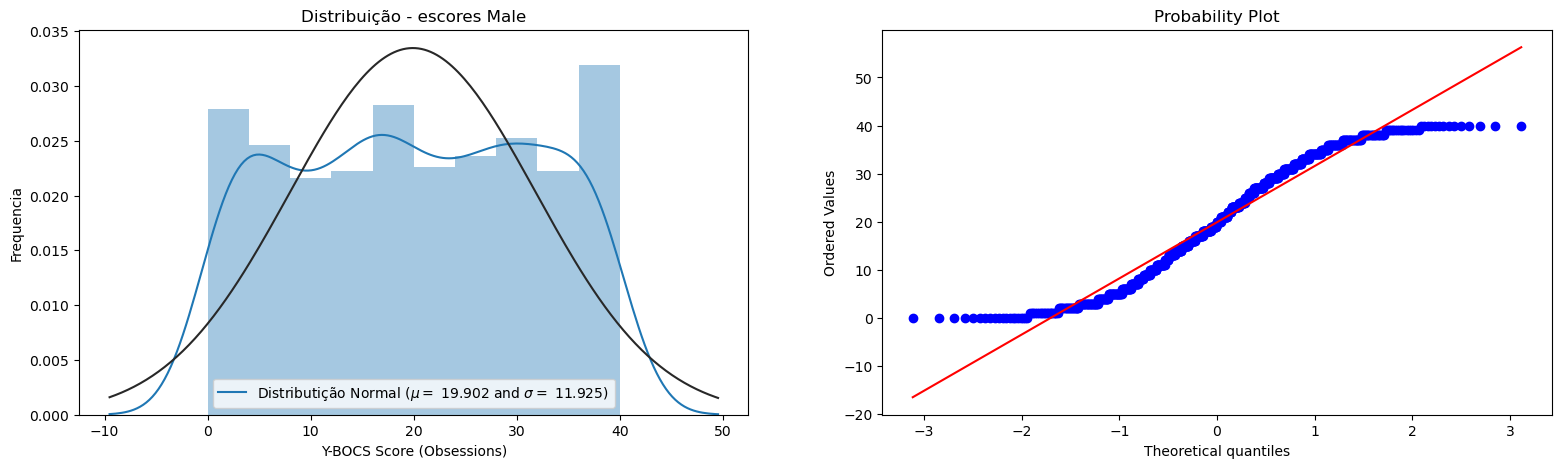

In [288]:
(mu, sigma) = norm.fit(escores_male)
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(19, 5))

ax1 = sns.distplot(escores_male , fit=norm, ax=ax1)
ax1.legend([f'Distributição Normal ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequencia')
ax1.set_title(f'Distribuição - escores Male')
   
# Usando probplot para o gráfico de probabilidade
stats.probplot(escores_male, plot=ax2)
f.show();  

## Teste de Normalidade e Homogeneidade

In [315]:
#Teste de Shapiro para normalizada
_, p_valor_feminino = shapiro(escores_female)
_, p_valor_masculino = shapiro(escores_male)

# Teste de Levene para homogeneidade das variâncias
_, p_valor_variancias = levene(escores_female, escores_male)

print(f'p_valor_feminino: {p_valor_feminino}, p_valor_masculino: {p_valor_masculino}, p_valor_variancias: {p_valor_variancias}')

#Avaliação de pressupostos (normalidade e homogeneidade das variâncias)
if p_valor_feminino > 0.05 and p_valor_masculino > 0.05 and p_valor_variancias > 0.05:
    
    # Realizar o teste t de Student
    resultado_teste_t, valor_p = ttest_ind(escores_female, escores_male)
    
    # Exibir o resultado do teste
    print(f'Teste t de Student: {"Diferença significativa" if valor_p < nivel_significancia else "Sem diferença significativa"}')
    print(f'Estatísticas: {resultado_teste_t}, Valor p: {valor_p}')
else:
    print('Os pressupostos para o teste t de Student não foram atendidos. Seguir com teste não paramétrico.')


p_valor_feminino: 2.353719060204252e-14, p_valor_masculino: 3.466535911472138e-15, p_valor_variancias: 0.46910653120857493
Os pressupostos para o teste t de Student não foram atendidos. Seguir com teste não paramétrico.


## Teste de Mann-Whitney U:

Não assume uma distribuição específica para os dados.

In [316]:
from scipy.stats import mannwhitneyu

# Teste de Mann-Whitney U
estatisticas, valor_p = mannwhitneyu(escores_female, escores_male)

print(f'Teste de Mann-Whitney U: {"Diferença significativa" if valor_p < nivel_significancia else "Sem diferença significativa"}')
print(f'Estatísticas: {estatisticas}, Valor p: {valor_p}')


Teste de Mann-Whitney U: Sem diferença significativa
Estatísticas: 285168.0, Valor p: 0.6399821232917488


**Com base nos resultados do teste de Mann-Whitney U, não há evidência estatística suficiente para afirmar que há uma diferença significativa nos escores entre os grupos feminino e masculino.**

## 2. Sleep_health_and_lifestyle_dataset 
Objetivo:  Avaliar se existe diferença na proporção de pessoas que possuem ou não o distúrbio do sono (Insônia) para as diferenças ocupações na base de dados. Use o nível de significância de 5% e caso encontre diferenças, relate em quais das ocupações vemos essa diferença significativa

- H0: As proporções de pessoas com e sem insônia são iguais para todas as ocupações.
- H1: As proporções de pessoas com e sem insônia são diferentes para pelo menos uma ocupação.

In [419]:
data2 = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep=',')
data2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
1,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
2,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
3,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No
4,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No


In [420]:
df = pd.DataFrame(data2[['Occupation','Sleep Disorder']])

In [421]:
df.head()

,Occupation,Sleep Disorder
0,Doctor,No
1,Doctor,No
2,Teacher,Insomnia
3,Doctor,No
4,Doctor,No


In [422]:
df.describe()

,Occupation,Sleep Disorder
count,289,289
unique,7,2
top,Doctor,No
freq,67,213


In [423]:
df.isnull().sum().sort_index()/len(df)

Occupation        0.0
Sleep Disorder    0.0
dtype: float64

In [424]:
df.isna().sum().sort_index()/len(df)

Occupation        0.0
Sleep Disorder    0.0
dtype: float64

In [427]:
df['Occupation'].unique()

array(['Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant', 'Lawyer',
       'Salesperson'], dtype=object)

In [428]:
df['Sleep Disorder'].unique()

array(['No', 'Insomnia'], dtype=object)

In [429]:
tabela_frequencia_occup  = df['Occupation'].value_counts().reset_index()
tabela_frequencia_occup.columns = ['Valor', 'Frequência']
tabela_frequencia_occup = tabela_frequencia_occup.sort_values(by='Valor')
print(tabela_frequencia_occup)

         Valor  Frequência
3   Accountant          37
0       Doctor          67
1     Engineer          62
2       Lawyer          44
6        Nurse          12
5  Salesperson          31
4      Teacher          36


In [430]:
tabela_frequencia_slp  = df['Sleep Disorder'].value_counts().reset_index()
tabela_frequencia_slp.columns = ['Valor', 'Frequência']
tabela_frequencia_slp = tabela_frequencia_slp.sort_values(by='Valor')
print(tabela_frequencia_slp)

      Valor  Frequência
1  Insomnia          76
0        No         213


In [432]:
# Tabela de contingência
contingency_table = pd.crosstab(df['Sleep Disorder'], df['Occupation'])
contingency_table

Occupation,Accountant,Doctor,Engineer,Lawyer,Nurse,Salesperson,Teacher
Sleep Disorder,,,,,,,
Insomnia,7,3,5,2,3,29,27
No,30,64,57,42,9,2,9


## Aplicação do teste qui-quadrado para independência 

Apropriada quando se trabalha com variáveis categóricas e deseja-se avaliar se a ocorrência de uma categoria em uma variável é independente da ocorrência de uma categoria em outra variável. 

In [434]:
import pandas as pd
from scipy.stats import chi2_contingency

# Tabela de contingência
contingency_table = pd.crosstab(df['Sleep Disorder'], df['Occupation'])

#Verifica frequencias esperadas
expected_frequencies = chi2_contingency(contingency_table)[3]

if (expected_frequencies < 1).any():
    print("Algumas células têm frequências esperadas abaixo de 1")

# Teste qui-quadrado de independência (Variáveis categoricas)
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print('Há uma diferença significativa nas proporções entre as ocupações.\n')
    
    # Se houver uma diferença significativa calculamos as proporções de insônia em cada ocupação.
    proportions = df.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True).unstack()
    print(proportions)
else:
    print('Não há evidências de diferença significativa nas proporções entre as ocupações.')

Chi-square statistic: 155.27672811256065
P-value: 5.9210138109735935e-31
Há uma diferença significativa nas proporções entre as ocupações.

Sleep Disorder  Insomnia        No
Occupation                        
Accountant      0.189189  0.810811
Doctor          0.044776  0.955224
Engineer        0.080645  0.919355
Lawyer          0.045455  0.954545
Nurse           0.250000  0.750000
Salesperson     0.935484  0.064516
Teacher         0.750000  0.250000


## 3. treinamentoVendedores.csv

Objetivo: Determine ao nível de 2% de significância, se o método da empresa VendaPro Academy é realmente superior ao método convencional da empresa.

- H0: Não há diferença significativa entre as médias das duas amostras.
- H1: Há uma diferença significativa entre as médias das duas amostras. 

In [458]:
data3 = pd.read_csv('treinamentoVendedores.csv', sep=',')
data3.head()
df = data3.copy()

## Aplicação de teste t pareado

Apropriado quando você temos pares de observações relacionadas (no caso, os tempos de trabalho para cada funcionário nos dois métodos). 

**Avaliação dos pressupostos:**

**1. normalidade das diferenças**

In [459]:
#Shapiro
_, normalidade_p_value = stats.shapiro(df['Convencional'] - df['VendaPro'])

# Nível de significância
alpha = 0.05

# Avaliação da normalidade das diferenças
if normalidade_p_value > alpha:
    print("A diferença entre os métodos tem uma distribuição normal (não rejeita H0 de normalidade).")
else:
    print("A diferença entre os métodos não tem uma distribuição normal (rejeita H0 de normalidade).")

A diferença entre os métodos tem uma distribuição normal (não rejeita H0 de normalidade).


**2. homogeneidade das variâncias das diferenças**

In [460]:
#levene
homogeneidade_p_value = stats.levene(df['Convencional'], df['VendaPro']).pvalue

# Nível de significância
alpha = 0.05

# Avaliação da homogeneidade das variâncias das diferenças
if homogeneidade_p_value > alpha:
    print("As variâncias das diferenças são homogêneas (não rejeita H0 de homogeneidade de variâncias).")
else:
    print("As variâncias das diferenças não são homogêneas (rejeita H0 de homogeneidade de variâncias).")

As variâncias das diferenças são homogêneas (não rejeita H0 de homogeneidade de variâncias).


## Realização do teste t pareado após os pressupostos serem atendidos

In [461]:
import pandas as pd
from scipy import stats

if normalidade_p_value > alpha and homogeneidade_p_value > alpha:
    t_statistic, p_value = stats.ttest_rel(df['Convencional'], df['VendaPro'])
    
    # Verifica a significância estatística
    if p_value < alpha:
        print("Rejeita a hipótese nula. Existe evidência estatística de que o método VendaPro Academy é superior ao método convencional.")
    else:
        print("Não há evidência estatística suficiente para rejeitar a hipótese nula. Não podemos afirmar que um método é superior ao outro.")
else:
    print("Não é apropriado realizar o teste t pareado devido às violações dos pressupostos.")

Rejeita a hipótese nula. Existe evidência estatística de que o método VendaPro Academy é superior ao método convencional.


## 4. Musicas.csv

Objetivo: O objetivo central deste estudo é testar a hipótese de que existe uma diferença significativa no tempo, em horas, que as pessoas dedicam diariamente à audição de música, com base em seus gêneros musicais favoritos. Utilizar o nível de significância de 5% para verificar essa hipótese.

- H0: Não há diferença significativa no tempo médio dedicado à audição de música entre os diferentes gêneros musicais.
- H1: Existe uma diferença significativa no tempo médio dedicado à audição de música entre os diferentes gêneros musicais.

In [462]:
data4 = pd.read_csv('Musicas.csv', sep=',')
data4.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
1,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
2,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
4,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.


In [463]:
df = pd.DataFrame(data4[['Fav genre','Hours per day']])

In [477]:
df.head()

,Fav genre,Hours per day
0,Rock,1.5
1,Video game music,4.0
2,R&B,4.0
3,Video game music,3.0
4,K pop,1.0


In [465]:
df.isnull().sum().sort_index()/len(df)

Fav genre        0.0
Hours per day    0.0
dtype: float64

In [466]:
df.isna().sum().sort_index()/len(df)

Fav genre        0.0
Hours per day    0.0
dtype: float64

In [467]:
df['Fav genre'].unique()

array(['Rock', 'Video game music', 'R&B', 'K pop', 'Country', 'EDM',
       'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal', 'Folk'],
      dtype=object)

In [469]:
df['Hours per day'].unique()

array([ 1.5 ,  4.  ,  3.  ,  1.  ,  6.  ,  8.  ,  2.  , 12.  , 24.  ,
        5.  ,  0.5 ,  0.25,  0.  ,  7.  , 10.  ,  2.5 ,  9.  ,  0.7 ,
        4.5 , 20.  , 15.  , 14.  , 13.  ,  0.1 , 11.  , 18.  ])

In [472]:
tabela_frequencia_FavGenre  = df['Fav genre'].value_counts().reset_index()
tabela_frequencia_FavGenre.columns = ['Valor', 'Frequência']
tabela_frequencia_FavGenre = tabela_frequencia_FavGenre.sort_values(by='Valor')
print(tabela_frequencia_FavGenre)

               Valor  Frequência
3          Classical          53
10           Country          25
5                EDM          37
8               Folk          30
7            Hip hop          35
9              K pop          26
2              Metal          88
1                Pop         114
6                R&B          35
11               Rap          22
0               Rock         188
4   Video game music          44


In [475]:
tabela_frequencia_Hours  = df['Hours per day'].value_counts().reset_index()
tabela_frequencia_Hours.columns = ['Valor', 'Frequência']
tabela_frequencia_Hours = tabela_frequencia_Hours.sort_values(by='Valor')
print(tabela_frequencia_Hours)

    Valor  Frequência
12   0.00           6
23   0.10           1
16   0.25           2
7    0.50          20
18   0.70           1
2    1.00         112
9    1.50          17
0    2.00         167
13   2.50           5
1    3.00         116
3    4.00          78
19   4.50           1
4    5.00          49
5    6.00          45
10   7.00          13
6    8.00          25
15   9.00           3
8   10.00          19
24  11.00           1
11  12.00           7
22  13.00           1
21  14.00           1
17  15.00           2
25  18.00           1
20  20.00           1
14  24.00           3


### Dado que estamos lidando com mais de dois grupos (gêneros musicais), será realizado a Análise de Variância (ANOVA).

In [480]:
# Realiza a ANOVA
result = stats.f_oneway(
    df['Hours per day'][df['Fav genre'] == 'Rock'],
    df['Hours per day'][df['Fav genre'] == 'Video game music'],
    df['Hours per day'][df['Fav genre'] == 'R&B'],
    df['Hours per day'][df['Fav genre'] == 'K pop'],
    df['Hours per day'][df['Fav genre'] == 'Country'],
    df['Hours per day'][df['Fav genre'] == 'EDM'],
    df['Hours per day'][df['Fav genre'] == 'Hip hop']
)

# Exibe os resultados
print("Estatística F:", result.statistic)
print("Valor-p:", result.pvalue)

# Compara o valor-p com o nível de significância (5%)
alpha = 0.05
if result.pvalue < alpha:
    print("Rejeitar a hipótese nula: Existe uma diferença significativa.")
else:
    print("Falha em rejeitar a hipótese nula: Não há evidências suficientes para afirmar uma diferença significativa.")


Estatística F: 1.1077876244156475
Valor-p: 0.3570210527640474
Falha em rejeitar a hipótese nula: Não há evidências suficientes para afirmar uma diferença significativa.


**Como a ANOVA não dirá exatamente quais grupos são diferentes entre si, apenas se há uma diferença significativa e como o teste resultou em uma diferença significativa, será realizado o teste de Tukey para identificar quais grupos são diferentes.**

In [493]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Aplica o teste de Tukey para comparações múltiplas
tukey_results = pairwise_tukeyhsd(df['Hours per day'], df['Fav genre'])

# Cria um DataFrame com os resultados do teste de Tukey
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

In [495]:
tukey_df.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Classical,Country,0.5379,0.9998,-1.8172,2.8931,False
1,Classical,EDM,1.7125,0.2280,-0.3670,3.7920,False
2,Classical,Folk,0.3546,1.0000,-1.8632,2.5724,False
3,Classical,Hip hop,1.0465,0.9002,-1.0677,3.1607,False
4,Classical,K pop,1.1179,0.9168,-1.2062,3.4421,False


In [497]:
tukey_df[tukey_df['reject'] == True]

,group1,group2,meandiff,p-adj,lower,upper,reject
57,Pop,Rap,2.4103,0.025,0.1499,4.6707,True


**Há uma diferença significativa entre os grupos "Pop" e "Rap".**

## 5. Treinador.csv

Objetivo: Validar se existe essa diferença significativa do comportamento do treinador no tempo de corrida das equipes, use o nível de significância de 5%. Se sim, entre quais tipos de comportamentos vemos um tempo menor para finalização da corrida?


In [499]:
data5 = pd.read_csv('ImpactoTreinador.csv', sep=',')
data5.head()

,Equipe,Semana,Tipo de Treinador,Tempo de Corrida
0,1,1,Motivador,42.483571
1,1,1,Rigoroso,46.308678
2,1,1,Colaborador,53.238443
3,1,1,Analítico,47.615149
4,2,1,Motivador,38.829233


In [500]:
df = pd.DataFrame(data5[['Tipo de Treinador','Tempo de Corrida']])

In [501]:
df.head()

,Tipo de Treinador,Tempo de Corrida
0,Motivador,42.483571
1,Rigoroso,46.308678
2,Colaborador,53.238443
3,Analítico,47.615149
4,Motivador,38.829233


In [502]:
df.isnull().sum().sort_index()/len(df)

Tempo de Corrida     0.0
Tipo de Treinador    0.0
dtype: float64

In [503]:
df.isna().sum().sort_index()/len(df)

Tempo de Corrida     0.0
Tipo de Treinador    0.0
dtype: float64

In [504]:
df['Tipo de Treinador'].unique()

array(['Motivador', 'Rigoroso', 'Colaborador', 'Analítico'], dtype=object)

### Dado que estamos lidando com mais de dois grupos (tipo de treinador), será realizado a Análise de Variância (ANOVA).

In [506]:
import scipy.stats as stats

tempo_motivador = df[df['Tipo de Treinador'] == 'Motivador']['Tempo de Corrida']
tempo_rigoroso = df[df['Tipo de Treinador'] == 'Rigoroso']['Tempo de Corrida']
tempo_colaborador = df[df['Tipo de Treinador'] == 'Colaborador']['Tempo de Corrida']
tempo_analitico = df[df['Tipo de Treinador'] == 'Analítico']['Tempo de Corrida']

# Realiza o teste t
statistic, p_value = stats.f_oneway(tempo_motivador, tempo_rigoroso, tempo_colaborador, tempo_analitico)

# Nível de significância
alpha = 0.05

# Avalia o valor p
if p_value < alpha:
    print("Rejeitar H0: Há diferença significativa no tempo de corrida entre os tipos de treinadores.")
else:
    print("Não rejeitar H0: Não há evidência de diferença significativa no tempo de corrida entre os tipos de treinadores.")

Rejeitar H0: Há diferença significativa no tempo de corrida entre os tipos de treinadores.


In [508]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Aplica o teste de Tukey para comparações múltiplas
tukey_results = pairwise_tukeyhsd(df['Tempo de Corrida'], df['Tipo de Treinador'])

# Cria um DataFrame com os resultados do teste de Tukey
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

In [512]:
tukey_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Analítico,Colaborador,8.7142,0.0000,4.3268,13.1016,True
1,Analítico,Motivador,-1.4272,0.8246,-5.8146,2.9602,False
2,Analítico,Rigoroso,4.0770,0.0775,-0.3104,8.4644,False
3,Colaborador,Motivador,-10.1414,0.0000,-14.5288,-5.7540,True
4,Colaborador,Rigoroso,-4.6372,0.0344,-9.0246,-0.2498,True
5,Motivador,Rigoroso,5.5042,0.0084,1.1168,9.8916,True


In [510]:
tukey_df[tukey_df['reject'] == True]

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Analítico,Colaborador,8.7142,0.0000,4.3268,13.1016,True
3,Colaborador,Motivador,-10.1414,0.0000,-14.5288,-5.7540,True
4,Colaborador,Rigoroso,-4.6372,0.0344,-9.0246,-0.2498,True
5,Motivador,Rigoroso,5.5042,0.0084,1.1168,9.8916,True
